In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [164]:
import warnings
warnings.filterwarnings("ignore")

In [162]:
import pandas as pd
df = pd.read_csv('/Users/ayeshamoqeet/Desktop/training_set.csv') 
df.head(3)
dft = pd.read_csv('/Users/ayeshamoqeet/Desktop/test_set.csv') 
dft.head(3)

,GRE Score,Chance of Admit
0,323,0.92
1,312,0.71
2,310,0.71


In [181]:
x_train = df.values[:, 0]  # get input values from first column
y_train = df.values[:, 1]  # get output values from last coulmn
x_test = dft.values[:, 0]
x_testt = dft.values[:, 0]
y_test = dft.values[:, 1]
m = len(y_train)
x_train = np.reshape(x_train, (m, 1))
x_train = np.hstack((np.ones((m,1)),x_train))
n = len(y_test)
x_test = np.reshape(x_test, (n, 1))
x_test = np.hstack((np.ones((n,1)),x_test))

In [165]:
def batchgradientDescent(X, y, alpha, epoch):
  m = X.shape[0]     
  n = X.shape[1]   # 
  Theta =  np.zeros(len(X[1]))    
  h = np.dot(X, Theta) 
  for i in range (0, epoch):
    Theta[0] = Theta[0] - (alpha / X.shape[0]) * sum(h-y)
    for j in range(1, n):
      Theta[j]= Theta[j] - (alpha/ X.shape[0]) * sum((h-y) * X[:, j])
    h  = np.dot(X, Theta)
  return Theta

In [166]:
def predict(x,parameter):
  y_pred = x.dot(parameter)
  return y_pred
parameter = batchgradientDescent(x_train, y_train, 0.00001, 1000)
y_pred = predict(x_test,parameter)

In [167]:
def MSE(y_pred,y_actual):
  cost = sum(y_pred-y_actual)**2/(2 * m)
  return cost

parameter = batchgradientDescent(x_train, y_train, 0.000001, 10000)
y_pred = predict(x_test,parameter)
print(MSE(y_pred,y_test))

0.0007529192275839592


In [173]:
x_train = {}
y_train = {}

x_test = {}
y_test = {}

for i in range(5):
  x_train[i] = train[i].values[:, 0]  
  y_train[i] = train[i].values[:, 1]  
  x_test[i] = val[i].values[:, 0]
  y_test[i] = val[i].values[:, 1]
  m = len(y_train[i])
  x_train[i] = np.reshape(x_train[i], (m, 1))
  x_train[i] = np.hstack((np.ones((m,1)),x_train[i]))
  n = len(y_test[i])
  x_test[i] = np.reshape(x_test[i], (n, 1))
  x_test[i] = np.hstack((np.ones((n,1)),x_test[i]))

In [174]:
def folds(dataframe, i, k):
    n = len(dataframe)
    val = dataframe[n*(i-1)//k:n*i//k]
    train = dataframe[~dataframe.isin(val)].dropna()
    return val,train

train = {}
val ={}
for i in range(5):
        val[i], train[i] =  folds(df, i+1, 5)

In [175]:
def five_fold_val(alpha):
  cost = []
  for i in range(5):
    parameter = batchgradientDescent(x_train[i], y_train[i], alpha, 1000)
    y_pred = predict(x_test[i],parameter)
    cost.append(MSE(y_pred,y_test[i])) 
  return sum(cost)

alpha = [0.1, 0.0001, 0.00001,0.000001, 0.00000001, 0.0000000001]
Totalcost = []
for j in alpha:
  Totalcost.append(five_fold_val(j)) 

print(Totalcost)

[nan, nan, 0.08329539187356258, 0.08329556037577017, 3.7119608039526533, 27.049016485471476]


In [176]:
def five_fold_val(epoch):
  cost = []
  for i in range(5):
    parameter = batchgradientDescent(x_train[i], y_train[i], 0.000001, epoch)
    y_pred = predict(x_test[i],parameter)
    cost.append(MSE(y_pred,y_test[i])) 
  return sum(cost)

epoch = [1,3,5,10,100,1000,10000]
Totalcost = []
for j in epoch:
  Totalcost.append(five_fold_val(j)) 

print(Totalcost)

[22.327109857777216, 14.614834677036841, 9.57069858911228, 3.3386987487928845, 0.08328907019524068, 0.08329556037577017, 0.0832953918735638]


In [177]:
import matplotlib.pyplot as plt

def GraphsforAlpha(alpha):
  def five_fold_val(epoch):
    cost_val = []
    cost_train = []
    for i in range(5):
      parameter = batchgradientDescent(x_train[i], y_train[i], alpha, epoch)
      y_pred = predict(x_test[i],parameter)
      cost_val.append(MSE(y_pred,y_test[i]))
      y_pred_train = predict(x_train[i],parameter)
      cost_train.append(MSE(y_pred_train,y_train[i])) 
    return sum(cost_train), sum(cost_val)

  epoch = [10,20,30,40,50,70,80,100,200]
  Training_loss = []
  Validation_loss = []
  for j in epoch:
    Training_loss.append((five_fold_val(j)[0])) 
    Validation_loss.append((five_fold_val(j)[1]))

  plt.plot(epoch, Training_loss, 'r--')
  plt.plot(epoch, Validation_loss, 'b-')
  plt.legend(['Training Loss', 'Test Loss'])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title(alpha)
  plt.show();

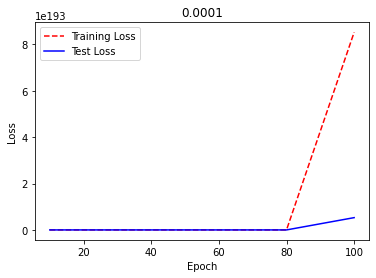

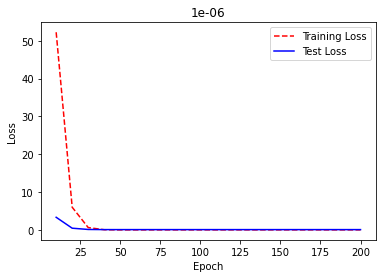

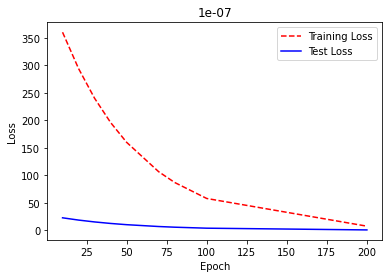

In [179]:
alpha = [0.0001,0.000001, 0.0000001]

for i in alpha:
  GraphsforAlpha(i)

In [ ]:
# optimal value is 1e^-06 and epcohes around 30

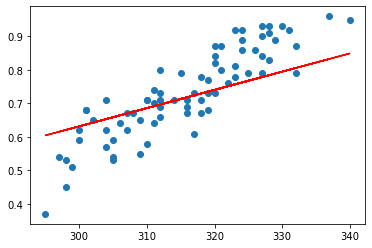

In [183]:
y = -0.9999830557238819 + 0.005438172683185962*x_testt
plt.plot(x_testt, y,'r-')
plt.scatter(x_testt,y_test)
plt.show()

In [ ]:
#part 2

In [152]:
import pandas as pd
df = pd.read_csv('/Users/ayeshamoqeet/Desktop/training_set.csv') 
df.head(3)
dft = pd.read_csv('/Users/ayeshamoqeet/Desktop/test_set.csv') 
dft.head(3)
dfv = pd.read_csv('/Users/ayeshamoqeet/Desktop/validation_set.csv') 
dfv

,date,location,population,median_age,gdp_per_capita,human_development_index,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,reproduction_rate,new_cases,total_cases,total_tests,positive_rate,stringency_index,hospital_beds_per_thousand,new_deaths
0,11/15/2020,Paraguay,7132530.0,26.5,8827.010,0.702,1.7,199.128,8.27,74.25,1.08,509.0,71574.0,402564.0,0.233,61.11,1.30,18.0
1,11/15/2020,Peru,32971846.0,29.1,12236.706,0.750,3.5,85.755,5.95,76.74,0.98,2249.0,934899.0,1385389.0,0.050,74.07,1.60,71.0
2,11/15/2020,Uruguay,3473727.0,35.6,20551.409,0.804,0.1,160.708,6.93,77.91,1.26,73.0,4030.0,370424.0,0.020,43.52,2.80,1.0
3,11/16/2020,Argentina,45195777.0,31.9,18933.907,0.825,0.6,191.032,5.50,76.67,0.91,7893.0,1318384.0,3230131.0,0.412,79.17,5.00,291.0
4,11/16/2020,Bolivia,11673029.0,25.4,6885.829,0.693,7.1,204.299,6.89,71.51,0.99,125.0,143371.0,345687.0,0.120,84.26,1.10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,12/9/2020,Peru,32971846.0,29.1,12236.706,0.750,3.5,85.755,5.95,76.74,1.03,2709.0,976621.0,1738324.0,0.076,67.59,1.60,127.0
169,12/9/2020,Uruguay,3473727.0,35.6,20551.409,0.804,0.1,160.708,6.93,77.91,1.31,298.0,8104.0,484274.0,0.045,50.00,2.80,1.0
170,12/10/2020,Argentina,45195777.0,31.9,18933.907,0.825,0.6,191.032,5.50,76.67,0.96,6994.0,1482216.0,3706016.0,0.306,79.17,5.00,209.0
171,12/10/2020,Bolivia,11673029.0,25.4,6885.829,0.693,7.1,204.299,6.89,71.51,1.40,325.0,146385.0,373293.0,0.136,47.22,1.10,4.0


In [131]:
x_train = df.values[:, 2:17]
y_train = df.values[:, -1] 
x_train = x_train.astype(float)
y_train = y_train.astype(float)

In [125]:
import numpy as np
cov = []
for i in range(15):
  cov.append(np.corrcoef(x_train[:, i], y_train, rowvar=True)[0,1])

cov

[0.34323889769302174,
 0.04193011694571246,
 0.02817419535838109,
 0.06994879146928112,
 0.05448422298070019,
 -0.17918812132794307,
 -0.1733428953225832,
 0.09146662785363961,
 -0.1440397107798361,
 0.5454681447897511,
 0.35936244118929583,
 0.2486157704956246,
 0.28723423184272917,
 0.11831749265688535,
 0.103825743862801]

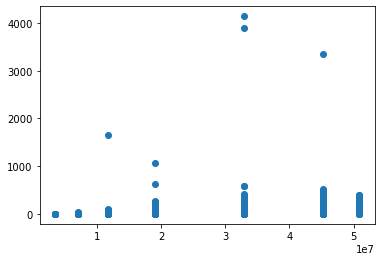

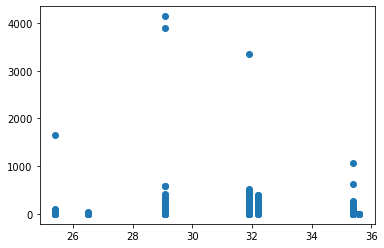

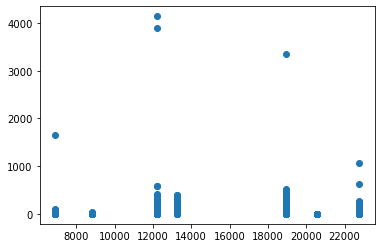

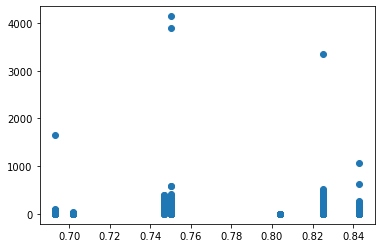

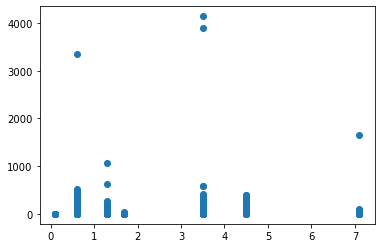

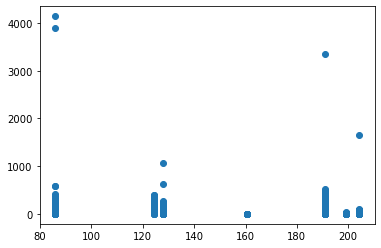

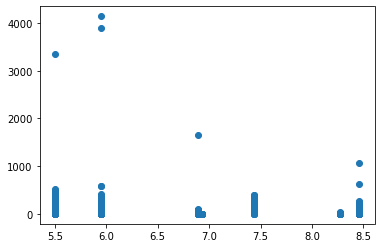

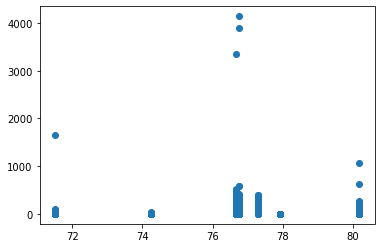

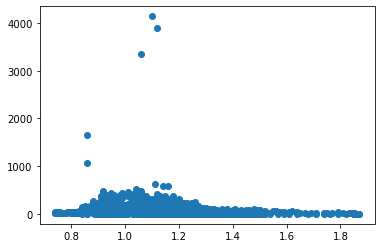

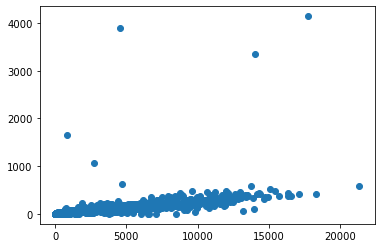

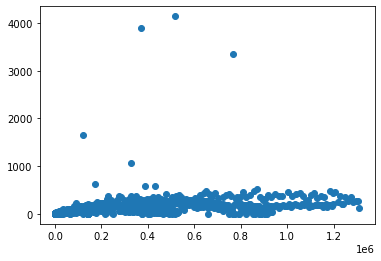

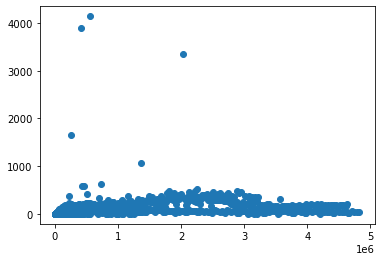

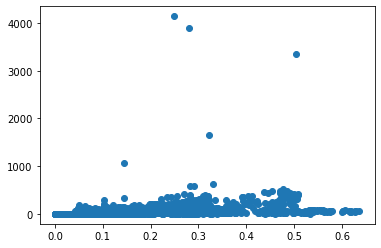

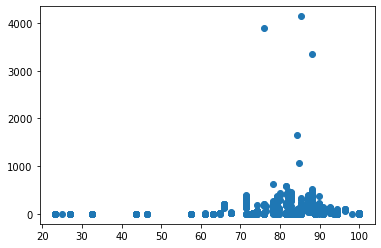

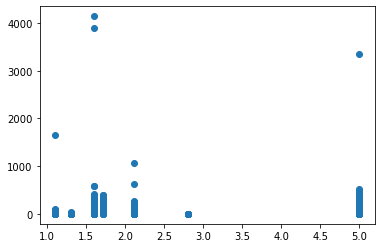

In [129]:
for i in range(15): 
    plt.scatter(x_train[:, i], y_train)
    
    plt.show()

In [153]:
df = df.drop(['date','location','population', 'new_cases','total_cases','total_tests','positive_rate'], axis = 1) 
dft = dft.drop(['date','location','population', 'new_cases','total_cases','total_tests','positive_rate'], axis = 1) 
dfv = dfv.drop(['date','location','population', 'new_cases','total_cases','total_tests','positive_rate'], axis = 1) 

In [154]:
x_train = df.values[:, 0:10] 
y_train = df.values[:, -1]  
x_test = dft.values[:, 0:10] 
y_test = dft.values[:, -1]  
x_val = dfv.values[:, 0:10] 
y_val = dfv.values[:, -1] 

In [155]:
def datanormalize(x):
  x = np.array(x,dtype=float)
  mean = np.mean(x, axis = 0) 
  std = np.std(x, axis= 0, ddof = 1)
  X_norm = (x - mean)/std
  return X_norm

x_train = datanormalize(x_train)

def datanormalizetesting(x):
  x = np.array(x,dtype=float)
  mean = np.mean(x_train, axis = 0) 
  std = np.std(x_train, axis= 0, ddof = 1)
  X_norm = (x_train - mean)/std
  return X_norm

x_test = datanormalize(x_test)
x_val = datanormalize(x_val)

In [156]:
m = len(y_train)
ones = np.ones((m))
x_train = np.column_stack((ones,x_train))

m = len(y_test)
onest = np.ones((m))
x_test = np.column_stack((onest,x_test))
m = len(y_val)
onesv = np.ones((m))
x_val = np.column_stack((onesv,x_val))

In [157]:
def gradient_descent(X, y, alpha, epoch):
  m = X.shape[0]     
  n = X.shape[1]   # 
  Theta =  np.zeros(len(X[1]))    
  h = np.dot(X, Theta) 
  cost = np.ones(epoch)
  for i in range (0, epoch):
    Theta[0] = Theta[0] - (alpha / X.shape[0]) * sum(h-y)
    for j in range(1, n):
      Theta[j]= Theta[j] - (alpha/ X.shape[0]) * sum((h-y) * X[:, j])
    h  = np.dot(X, Theta)
    cost[i] = 1/(2*m) * sum(np.square(h-y))  # Compute Cost
  return cost, Theta

costs, theta = gradient_descent(x_train, y_train, 0.2, 100)

In [160]:
def MSE(X,y, epoch): 
  h = np.dot(X, gradient_descent(x_train, y_train,0.2, epoch)[1])
  global cost
  cost = 1/(2*m) * sum(np.square(h-y))
  return cost

print(MSE(x_val,y_val,1000))

2442.3758878668527


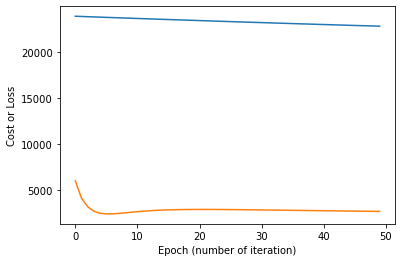

Lowest cost =2650.1791518955674
 Cost after 50 iterations = 22818.867039037195


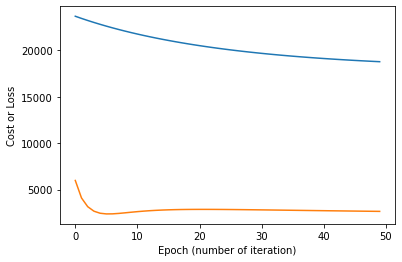

Lowest cost =2650.1791518955674
 Cost after 50 iterations = 18782.54283055994


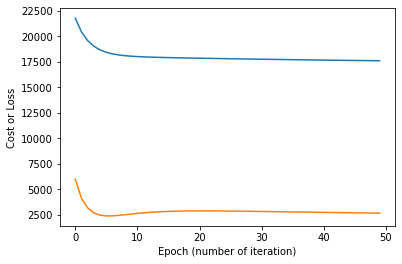

Lowest cost =2650.1791518955674
 Cost after 50 iterations = 17579.09529394151


In [161]:
alpha = [0.002,0.02,0.2]

for a in alpha:
  costs, theta = gradient_descent(x_train, y_train, a, 50)
  cos1 = np.ones(50)
  for i in range(50):
    cos1[i] = MSE(x_val,y_val,i)
  plt.plot(costs)
  plt.plot(cos1)
  plt.xlabel("Epoch (number of iteration)")
  plt.ylabel( "Cost or Loss")
  plt.show()
  print("Lowest cost =" + str(np.min(cost)))
  print(" Cost after 50 iterations = " + str(costs[-1]))

In [ ]:
#Optimal number is 20 epochs with alpha value of 0.2

In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics

reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_val)
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred)) 

Mean Squared Error: 5675.995403510154


In [21]:
from sklearn.linear_model import Ridge

Mean Squared Error: 3650.8139869609586


In [77]:
List = [l*3 for l in range(0,200)]    
MSES = []
for l in List:
    clf = Ridge(alpha=l).fit(x_train, y_train)
    y_pred = clf.predict(x_val)
    MSE = metrics.mean_squared_error(y_val, y_pred)
    MSES.append(MSE)

min_MSE = min(MSES)
print("Min MSE",min_MSE )
for l in List:
    clf = Ridge(alpha=l).fit(x_train, y_train)
    y_pred = clf.predict(x_val)
    MSE = metrics.mean_squared_error(y_val, y_pred)
    if MSE == min_MSE:
        print("Optimal Lmda value:", l)

    

Min MSE 3613.821942757866
Optimal Lmda value: 150


In [74]:
from sklearn.linear_model import Lasso

List = [l*0.1 for l in range(0,100)] 

In [114]:
MSES = []
for l in List:
    clf = Lasso(alpha=l).fit(x_train, y_train)
    y_pred = clf.predict(x_val)
    MSE = metrics.mean_squared_error(y_val, y_pred)
    MSES.append(MSE)

min_MSE = min(MSES)
print("Min MSE",min_MSE )
for l in List:
    clf = Lasso(alpha=l).fit(x_train, y_train)
    y_pred = clf.predict(x_val)
    MSE = metrics.mean_squared_error(y_val, y_pred)
    if MSE == min_MSE:
        print("Optimal Lamda value:", l)

Min MSE 3723.6141605610574
Optimal Lamda value: 3.8000000000000003


In [78]:
from sklearn.linear_model import ElasticNet

In [85]:
List = [l*0.1 for l in range(0,100)] 

In [115]:
MSES = []
for l in List:
    clf = ElasticNet(alpha=l).fit(x_train, y_train)
    y_pred = clf.predict(x_val)
    MSE = metrics.mean_squared_error(y_val, y_pred)
    MSES.append(MSE)

min_MSE = min(MSES)
print("Min MSE",min_MSE )
for l in List:
    clf = ElasticNet(alpha=l).fit(x_train, y_train)
    y_pred = clf.predict(x_val)
    MSE = metrics.mean_squared_error(y_val, y_pred)
    if MSE == min_MSE:
        print("Optimal Lamda value:", l)

Min MSE 3620.4245122007896
Optimal Lamda value: 0.2


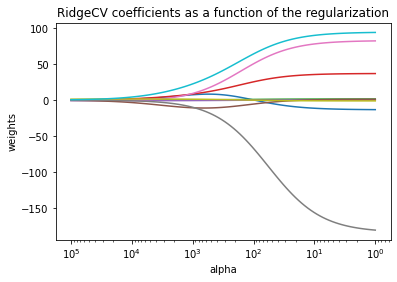

In [88]:
n_alphas = 100
alphas = np.logspace(0.001,5, n_alphas)
coefs = []
for a in alphas:
    ridge = linear_model.RidgeCV(alphas=[a], fit_intercept=True, cv=5)
    ridge.fit(x_train, y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('c0=efficents')
plt.title('RidgeCV coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

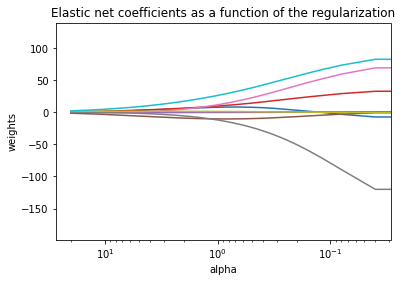

In [116]:
n_alphas = 500
alphas = np.linspace(0,20 ,n_alphas)
coefs = []
for a in alphas:
    r = linear_model.ElasticNetCV(alphas=[a])
    r.fit(x_train, y_train)
    coefs.append(r.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('lambdas')
plt.ylabel('co-efficents')
plt.title('Elastic net coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

Lasso

In [122]:
#Ridge
clf = Ridge(alpha=150).fit(x_train, y_train)
y_pred = clf.predict(x_test)
MSE = metrics.mean_squared_error(y_test, y_pred)
MSE

3410.5256243073277

In [118]:
#Lasso
clf = Lasso(alpha=3.8).fit(x_train, y_train)
y_pred = clf.predict(x_test)
MSE = metrics.mean_squared_error(y_test, y_pred)
MSE

3616.930306631797

In [120]:
#Elastic Net
clf = ElasticNet(alpha=0.2).fit(x_train, y_train)
y_pred = clf.predict(x_test)
MSE = metrics.mean_squared_error(y_test, y_pred)
MSE

3423.1688207531024